In [1]:
from __future__ import print_function
import sys
sys.path.insert(1, r'C:\Users\KIIT\Desktop\Machine Learning\My projects\My papers\Survey on Generative Models\GitHub Resources\DBN')

print(__doc__)

import numpy as np

from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from dbn.models import UnsupervisedDBN # use "from dbn.tensorflow import SupervisedDBNClassification" for computations on TensorFlow
import pandas as pd

Automatically created module for IPython interactive environment


In [48]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(horizontal_flip = True)
test_datagen = ImageDataGenerator()

training_set = train_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\MNIST as jpg\training_set',
                                                 target_size = (28, 28),
                                                 batch_size = 33602,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\MNIST as jpg\test_set',
                                            target_size = (28, 28),
                                            batch_size = 8398,
                                            class_mode = 'categorical')

Found 33602 images belonging to 10 classes.
Found 8398 images belonging to 10 classes.


In [49]:
X_train, Y_train = training_set.next()
X_test, Y_test = test_set.next()

In [50]:
unique, counts = np.unique(X_train, return_counts=True)
dict(zip(unique, counts))

{0.0: 49115511,
 1.0: 1911363,
 2.0: 1774011,
 3.0: 1624764,
 4.0: 1483005,
 5.0: 1325019,
 6.0: 1162680,
 7.0: 1017339,
 8.0: 874809,
 9.0: 756864,
 10.0: 647418,
 11.0: 548286,
 12.0: 467511,
 13.0: 391824,
 14.0: 333609,
 15.0: 284757,
 16.0: 236655,
 17.0: 202491,
 18.0: 169266,
 19.0: 146961,
 20.0: 127239,
 21.0: 111600,
 22.0: 96951,
 23.0: 88050,
 24.0: 77664,
 25.0: 70332,
 26.0: 64374,
 27.0: 59448,
 28.0: 55401,
 29.0: 54765,
 30.0: 50268,
 31.0: 48378,
 32.0: 47127,
 33.0: 45003,
 34.0: 43488,
 35.0: 43041,
 36.0: 41958,
 37.0: 43053,
 38.0: 40851,
 39.0: 42000,
 40.0: 39444,
 41.0: 38523,
 42.0: 38499,
 43.0: 38880,
 44.0: 38208,
 45.0: 37323,
 46.0: 37869,
 47.0: 37227,
 48.0: 36858,
 49.0: 37353,
 50.0: 37128,
 51.0: 37164,
 52.0: 36411,
 53.0: 36036,
 54.0: 36381,
 55.0: 35961,
 56.0: 36108,
 57.0: 35322,
 58.0: 35901,
 59.0: 35142,
 60.0: 34926,
 61.0: 34830,
 62.0: 34392,
 63.0: 35373,
 64.0: 34467,
 65.0: 34362,
 66.0: 33402,
 67.0: 33675,
 68.0: 33783,
 69.0: 33351,

In [51]:
X_train.shape

(33602, 28, 28, 3)

In [52]:
X_train = X_train[:, :, :, 0]
X_test = X_test[:, :, :, 0]

In [53]:
X_train.shape

(33602, 28, 28)

In [54]:
labels = []
for i in range(len(Y_train)):
    labels.append(np.where(Y_train[i] == 1)[0][0])
Y_train = np.array(labels)

In [55]:
labels = []
for i in range(len(Y_test)):
    labels.append(np.where(Y_test[i] == 1)[0][0])
Y_test = np.array(labels)

In [56]:
X_train.shape

(33602, 28, 28)

In [57]:
X_train_mat = np.zeros(shape=(33602, 28*28))
X_test_mat = np.zeros(shape=(8398, 28*28))

In [58]:
for row in range(len(X_train)):
    X_train_mat[row] = X_train[row].ravel()

In [59]:
X_train = X_train_mat

In [60]:
for row in range(len(X_test)):
    X_test_mat[row] = X_test[row].ravel()

In [61]:
X_test = X_test_mat

In [62]:
X_train.shape

(33602, 784)

In [43]:
def nudge_dataset(X, Y):
    """
    This produces a dataset 5 times bigger than the original one,
    by moving the 8x8 images in X around by 1px to left, right, down, up
    """
    direction_vectors = [
        [[0, 1, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [1, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 1],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 1, 0]]]

    def shift(x, w):
        return convolve(x.reshape((28, 28)), mode='constant', weights=w).ravel()

    X = np.concatenate([X] +
                       [np.apply_along_axis(shift, 1, X, vector)
                        for vector in direction_vectors])
    Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y

In [63]:
from sklearn.preprocessing import minmax_scale
X_train = np.asarray(X_train, 'float32')
X_test = np.asarray(X_test, 'float32')
#X_train, Y_train = nudge_dataset(X_train, Y_train)
#X_test, Y_test = nudge_dataset(X_test, Y_test)

X_train = minmax_scale(X_train, feature_range=(0, 1))  # 0-1 scaling
X_test = minmax_scale(X_test, feature_range=(0, 1))


In [64]:
X_train.shape

(33602, 784)

In [65]:
logistic = linear_model.LogisticRegression()
dbn = UnsupervisedDBN(hidden_layers_structure=[256, 512],
                      batch_size=10,
                      learning_rate_rbm=0.06,
                      n_epochs_rbm=10,
                      activation_function='sigmoid')

classifier = Pipeline(steps=[('dbn', dbn),
                             ('logistic', logistic)])

In [66]:
logistic.C = 6000.0

# Training RBM-Logistic Pipeline
classifier.fit(X_train, Y_train)

[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 7.809914
>> Epoch 2 finished 	RBM Reconstruction error 5.898251
>> Epoch 3 finished 	RBM Reconstruction error 5.203515
>> Epoch 4 finished 	RBM Reconstruction error 4.835923
>> Epoch 5 finished 	RBM Reconstruction error 4.582339
>> Epoch 6 finished 	RBM Reconstruction error 4.502327
>> Epoch 7 finished 	RBM Reconstruction error 4.319991
>> Epoch 8 finished 	RBM Reconstruction error 4.191722
>> Epoch 9 finished 	RBM Reconstruction error 4.211137
>> Epoch 10 finished 	RBM Reconstruction error 4.100776
>> Epoch 1 finished 	RBM Reconstruction error 3.356609
>> Epoch 2 finished 	RBM Reconstruction error 2.571931
>> Epoch 3 finished 	RBM Reconstruction error 2.183570
>> Epoch 4 finished 	RBM Reconstruction error 2.005837
>> Epoch 5 finished 	RBM Reconstruction error 1.904135
>> Epoch 6 finished 	RBM Reconstruction error 1.777992
>> Epoch 7 finished 	RBM Reconstruction error 1.676783
>> Epoch 8 finished 	RBM Reconstructi

C:\Users\KIIT\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('dbn',
                 UnsupervisedDBN(activation_function='sigmoid', batch_size=10,
                                 contrastive_divergence_iter=1,
                                 hidden_layers_structure=[256, 512],
                                 learning_rate_rbm=0.06, n_epochs_rbm=10,
                                 optimization_algorithm='sgd', verbose=True)),
                ('logistic',
                 LogisticRegression(C=6000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [67]:
logistic_classifier = linear_model.LogisticRegression(C=100.0)
logistic_classifier.fit(X_train, Y_train)

C:\Users\KIIT\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        classifier.predict(X_test))))

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        logistic_classifier.predict(X_test))))


Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       826
           1       0.98      0.99      0.98       936
           2       0.91      0.92      0.91       835
           3       0.89      0.90      0.90       870
           4       0.97      0.97      0.97       814
           5       0.89      0.85      0.87       759
           6       0.95      0.96      0.95       827
           7       0.95      0.96      0.95       880
           8       0.95      0.95      0.95       813
           9       0.95      0.93      0.94       838

    accuracy                           0.94      8398
   macro avg       0.94      0.94      0.94      8398
weighted avg       0.94      0.94      0.94      8398


Logistic regression using raw pixel features:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       826
           1       0.93      0.97      0.95 

In [69]:
##NOW RBM

In [70]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import minmax_scale
from sklearn.base import clone

In [71]:
logistic = linear_model.LogisticRegression(solver='newton-cg', tol=1)
rbm = BernoulliRBM(random_state=0, verbose=True)

rbm_features_classifier = Pipeline(
    steps=[('rbm', rbm), ('logistic', logistic)])

In [72]:
rbm.learning_rate = 0.06
rbm.n_iter = 10

rbm.n_components = 100
logistic.C = 6000


In [73]:
rbm_features_classifier.fit(X_train, Y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -145.53, time = 6.20s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -128.12, time = 7.02s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -122.91, time = 6.99s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -117.90, time = 7.02s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -117.66, time = 7.01s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -117.75, time = 6.97s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -109.95, time = 6.88s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -119.07, time = 7.01s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -117.34, time = 7.17s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -115.26, time = 7.31s


Pipeline(memory=None,
         steps=[('rbm',
                 BernoulliRBM(batch_size=10, learning_rate=0.06,
                              n_components=100, n_iter=10, random_state=0,
                              verbose=True)),
                ('logistic',
                 LogisticRegression(C=6000, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='newton-cg', tol=1, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [74]:
raw_pixel_classifier = clone(logistic)
raw_pixel_classifier.C = 100.
raw_pixel_classifier.fit(X_train, Y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=1, verbose=0,
                   warm_start=False)

In [75]:
Y_pred = rbm_features_classifier.predict(X_test)
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(Y_test, Y_pred)))

Y_pred = raw_pixel_classifier.predict(X_test)
print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(Y_test, Y_pred)))

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       826
           1       0.97      0.98      0.97       936
           2       0.85      0.86      0.85       835
           3       0.73      0.75      0.74       870
           4       0.90      0.90      0.90       814
           5       0.74      0.63      0.68       759
           6       0.90      0.93      0.91       827
           7       0.93      0.92      0.92       880
           8       0.81      0.84      0.83       813
           9       0.86      0.85      0.86       838

    accuracy                           0.86      8398
   macro avg       0.86      0.86      0.86      8398
weighted avg       0.86      0.86      0.86      8398


Logistic regression using raw pixel features:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       826
           1       0.95      0.88      0.92  

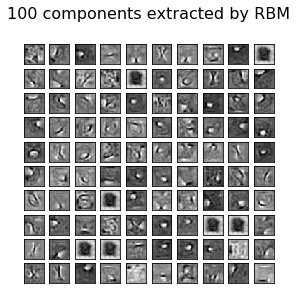

In [85]:
plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
plt.savefig(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\mnist_rbm_components.png', bbox_inches = 'tight')
plt.show()
plt.close()

In [93]:
#DBN for GAN
test_set = test_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\GAN Images\Classes',
                                            target_size = (28, 28),
                                            batch_size = 10000,
                                            class_mode = 'categorical')
X_test, Y_test = test_set.next()
X_test = X_test[:, :, :, 0]

labels = []
for i in range(len(Y_test)):
    labels.append(np.where(Y_test[i] == 1)[0][0])
Y_test = np.array(labels)

X_test_mat = np.zeros(shape=(10000, 28*28))

for row in range(len(X_test)):
    X_test_mat[row] = X_test[row].ravel()
X_test = X_test_mat

X_test = np.asarray(X_test, 'float32')
X_test = minmax_scale(X_test, feature_range=(0, 1))

print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        classifier.predict(X_test))))

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        logistic_classifier.predict(X_test))))

Found 10000 images belonging to 10 classes.
Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       952
           1       0.86      0.97      0.91       996
           2       0.81      0.77      0.79       991
           3       0.85      0.77      0.81      1280
           4       0.81      0.89      0.85       788
           5       0.68      0.77      0.72       623
           6       0.86      0.86      0.86       710
           7       0.83      0.93      0.87      1130
           8       0.90      0.74      0.82      1199
           9       0.86      0.83      0.85      1331

    accuracy                           0.84     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.85      0.84      0.84     10000


Logistic regression using raw pixel features:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       952
 

In [94]:
#RBM for GAN
Y_pred = rbm_features_classifier.predict(X_test)
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(Y_test, Y_pred)))

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       952
           1       0.87      0.94      0.90       996
           2       0.75      0.69      0.72       991
           3       0.72      0.64      0.68      1280
           4       0.74      0.84      0.79       788
           5       0.59      0.48      0.53       623
           6       0.80      0.81      0.81       710
           7       0.84      0.88      0.86      1130
           8       0.66      0.76      0.71      1199
           9       0.82      0.76      0.79      1331

    accuracy                           0.78     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.78      0.77     10000




In [95]:
#DBN for DCGAN
test_set = test_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\DCGAN Images\Classes',
                                            target_size = (28, 28),
                                            batch_size = 10000,
                                            class_mode = 'categorical')
X_test, Y_test = test_set.next()
X_test = X_test[:, :, :, 0]

labels = []
for i in range(len(Y_test)):
    labels.append(np.where(Y_test[i] == 1)[0][0])
Y_test = np.array(labels)

X_test_mat = np.zeros(shape=(10000, 28*28))

for row in range(len(X_test)):
    X_test_mat[row] = X_test[row].ravel()
X_test = X_test_mat

X_test = np.asarray(X_test, 'float32')
X_test = minmax_scale(X_test, feature_range=(0, 1))

print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        classifier.predict(X_test))))

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        logistic_classifier.predict(X_test))))

Found 10000 images belonging to 10 classes.
Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       948
           1       0.87      0.95      0.91      1043
           2       0.80      0.79      0.80       925
           3       0.79      0.70      0.74      1012
           4       0.85      0.93      0.89      1019
           5       0.66      0.76      0.71       794
           6       0.90      0.84      0.87      1112
           7       0.82      0.90      0.86      1008
           8       0.85      0.77      0.81      1070
           9       0.81      0.77      0.79      1069

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000


Logistic regression using raw pixel features:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       948
 

In [96]:
#RBM for DCGAN
Y_pred = rbm_features_classifier.predict(X_test)
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(Y_test, Y_pred)))

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       948
           1       0.83      0.94      0.88      1043
           2       0.76      0.74      0.75       925
           3       0.65      0.64      0.64      1012
           4       0.77      0.85      0.81      1019
           5       0.60      0.53      0.56       794
           6       0.84      0.79      0.82      1112
           7       0.79      0.85      0.82      1008
           8       0.74      0.68      0.71      1070
           9       0.75      0.69      0.72      1069

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000




In [97]:
#DBN for CoupledGAN
test_set = test_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\CoupledGAN Images\Classes',
                                            target_size = (28, 28),
                                            batch_size = 10000,
                                            class_mode = 'categorical')
X_test, Y_test = test_set.next()
X_test = X_test[:, :, :, 0]

labels = []
for i in range(len(Y_test)):
    labels.append(np.where(Y_test[i] == 1)[0][0])
Y_test = np.array(labels)

X_test_mat = np.zeros(shape=(10000, 28*28))

for row in range(len(X_test)):
    X_test_mat[row] = X_test[row].ravel()
X_test = X_test_mat

X_test = np.asarray(X_test, 'float32')
X_test = minmax_scale(X_test, feature_range=(0, 1))

print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        classifier.predict(X_test))))

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        logistic_classifier.predict(X_test))))

Found 11202 images belonging to 10 classes.
Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       905
           1       0.82      0.98      0.89      1120
           2       0.79      0.71      0.75       851
           3       0.71      0.75      0.73       730
           4       0.81      0.88      0.85       891
           5       0.76      0.74      0.75       758
           6       0.86      0.85      0.85       589
           7       0.86      0.91      0.88      1977
           8       0.89      0.67      0.76      1144
           9       0.79      0.81      0.80      1035

    accuracy                           0.83     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.83      0.83      0.83     10000


Logistic regression using raw pixel features:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       905
 

In [98]:
#RBM for CoupledGAN
Y_pred = rbm_features_classifier.predict(X_test)
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(Y_test, Y_pred)))

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       905
           1       0.87      0.95      0.91      1120
           2       0.72      0.73      0.72       851
           3       0.59      0.64      0.61       730
           4       0.76      0.83      0.79       891
           5       0.61      0.51      0.56       758
           6       0.85      0.80      0.83       589
           7       0.88      0.85      0.87      1977
           8       0.72      0.70      0.71      1144
           9       0.73      0.74      0.73      1035

    accuracy                           0.78     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.78      0.78      0.78     10000




In [107]:
#DBN for BiGAN
test_set = test_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\BiGAN Images\Classes',
                                            target_size = (28, 28),
                                            batch_size = 8798,
                                            class_mode = 'categorical')
X_test, Y_test = test_set.next()
X_test = X_test[:, :, :, 0]

labels = []
for i in range(len(Y_test)):
    labels.append(np.where(Y_test[i] == 1)[0][0])
Y_test = np.array(labels)

X_test_mat = np.zeros(shape=(8798, 28*28))

for row in range(len(X_test)):
    X_test_mat[row] = X_test[row].ravel()
X_test = X_test_mat

X_test = np.asarray(X_test, 'float32')
X_test = minmax_scale(X_test, feature_range=(0, 1))

print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        classifier.predict(X_test))))

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        logistic_classifier.predict(X_test))))

Found 10000 images belonging to 10 classes.
Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       792
           1       0.78      0.98      0.87       777
           2       0.73      0.69      0.71       826
           3       0.77      0.63      0.70      1237
           4       0.73      0.88      0.80       850
           5       0.60      0.62      0.61       685
           6       0.81      0.74      0.77       549
           7       0.76      0.90      0.82      1084
           8       0.81      0.59      0.68       947
           9       0.76      0.75      0.75      1051

    accuracy                           0.76      8798
   macro avg       0.76      0.76      0.76      8798
weighted avg       0.76      0.76      0.76      8798


Logistic regression using raw pixel features:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       792
 

In [108]:
#RBM for BiGAN
Y_pred = rbm_features_classifier.predict(X_test)
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(Y_test, Y_pred)))

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       792
           1       0.80      0.95      0.87       777
           2       0.68      0.65      0.66       826
           3       0.68      0.52      0.59      1237
           4       0.67      0.79      0.73       850
           5       0.46      0.44      0.45       685
           6       0.76      0.64      0.69       549
           7       0.79      0.84      0.81      1084
           8       0.56      0.61      0.58       947
           9       0.72      0.66      0.69      1051

    accuracy                           0.69      8798
   macro avg       0.69      0.70      0.69      8798
weighted avg       0.69      0.69      0.69      8798




In [103]:
#DBN for CGAN
test_set = test_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\CGAN Images\Classes',
                                            target_size = (28, 28),
                                            batch_size = 10000,
                                            class_mode = 'categorical')
X_test, Y_test = test_set.next()
X_test = X_test[:, :, :, 0]

labels = []
for i in range(len(Y_test)):
    labels.append(np.where(Y_test[i] == 1)[0][0])
Y_test = np.array(labels)

X_test_mat = np.zeros(shape=(10000, 28*28))

for row in range(len(X_test)):
    X_test_mat[row] = X_test[row].ravel()
X_test = X_test_mat

X_test = np.asarray(X_test, 'float32')
X_test = minmax_scale(X_test, feature_range=(0, 1))

print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        classifier.predict(X_test))))

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        logistic_classifier.predict(X_test))))

Found 10000 images belonging to 10 classes.
Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1000
           1       0.99      0.96      0.97      1000
           2       0.97      0.90      0.93      1000
           3       0.87      0.91      0.89      1000
           4       0.91      0.93      0.92      1000
           5       0.85      0.85      0.85      1000
           6       0.92      0.94      0.93      1000
           7       0.93      0.94      0.94      1000
           8       0.88      0.96      0.92      1000
           9       0.94      0.86      0.90      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000


Logistic regression using raw pixel features:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1000
 

In [104]:
#RBM for CGAN
Y_pred = rbm_features_classifier.predict(X_test)
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(Y_test, Y_pred)))

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1000
           1       0.99      0.94      0.97      1000
           2       0.93      0.92      0.92      1000
           3       0.78      0.79      0.79      1000
           4       0.89      0.89      0.89      1000
           5       0.82      0.74      0.78      1000
           6       0.92      0.90      0.91      1000
           7       0.95      0.90      0.92      1000
           8       0.69      0.94      0.80      1000
           9       0.89      0.79      0.84      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000




In [105]:
#DBN for LSGAN
test_set = test_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\LSGAN Images\Classes',
                                            target_size = (28, 28),
                                            batch_size = 10000,
                                            class_mode = 'categorical')
X_test, Y_test = test_set.next()
X_test = X_test[:, :, :, 0]

labels = []
for i in range(len(Y_test)):
    labels.append(np.where(Y_test[i] == 1)[0][0])
Y_test = np.array(labels)

X_test_mat = np.zeros(shape=(10000, 28*28))

for row in range(len(X_test)):
    X_test_mat[row] = X_test[row].ravel()
X_test = X_test_mat

X_test = np.asarray(X_test, 'float32')
X_test = minmax_scale(X_test, feature_range=(0, 1))

print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        classifier.predict(X_test))))

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        logistic_classifier.predict(X_test))))

Found 10000 images belonging to 10 classes.
Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       832
           1       0.83      0.97      0.90      1157
           2       0.77      0.66      0.71       654
           3       0.82      0.76      0.79      1535
           4       0.83      0.90      0.87       740
           5       0.71      0.77      0.74       963
           6       0.88      0.87      0.88       946
           7       0.83      0.93      0.87      1133
           8       0.84      0.68      0.75      1004
           9       0.82      0.80      0.81      1036

    accuracy                           0.83     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.83      0.82     10000


Logistic regression using raw pixel features:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       832
 

In [106]:
#RBM for LSGAN
Y_pred = rbm_features_classifier.predict(X_test)
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(Y_test, Y_pred)))

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       832
           1       0.86      0.96      0.90      1157
           2       0.69      0.69      0.69       654
           3       0.72      0.67      0.70      1535
           4       0.75      0.79      0.77       740
           5       0.62      0.50      0.55       963
           6       0.84      0.82      0.83       946
           7       0.85      0.86      0.85      1133
           8       0.65      0.68      0.66      1004
           9       0.72      0.78      0.75      1036

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000




In [109]:
#DBN for WGAN_Improved
test_set = test_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\WGAN_Improved\Classes',
                                            target_size = (28, 28),
                                            batch_size = 10000,
                                            class_mode = 'categorical')
X_test, Y_test = test_set.next()
X_test = X_test[:, :, :, 0]

labels = []
for i in range(len(Y_test)):
    labels.append(np.where(Y_test[i] == 1)[0][0])
Y_test = np.array(labels)

X_test_mat = np.zeros(shape=(10000, 28*28))

for row in range(len(X_test)):
    X_test_mat[row] = X_test[row].ravel()
X_test = X_test_mat

X_test = np.asarray(X_test, 'float32')
X_test = minmax_scale(X_test, feature_range=(0, 1))

print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        classifier.predict(X_test))))

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        logistic_classifier.predict(X_test))))

Found 10055 images belonging to 10 classes.
Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       873
           1       0.84      0.97      0.90      1016
           2       0.80      0.76      0.78      1120
           3       0.79      0.65      0.72      1185
           4       0.81      0.88      0.85       858
           5       0.63      0.71      0.67       826
           6       0.88      0.84      0.86      1093
           7       0.79      0.91      0.84       910
           8       0.80      0.73      0.76      1117
           9       0.80      0.74      0.77      1002

    accuracy                           0.80     10000
   macro avg       0.80      0.81      0.80     10000
weighted avg       0.80      0.80      0.80     10000


Logistic regression using raw pixel features:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       873
 

In [110]:
#RBM for WGAN_Improved
Y_pred = rbm_features_classifier.predict(X_test)
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(Y_test, Y_pred)))

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       873
           1       0.81      0.95      0.87      1016
           2       0.76      0.71      0.73      1120
           3       0.69      0.63      0.66      1185
           4       0.74      0.82      0.78       858
           5       0.56      0.53      0.55       826
           6       0.82      0.79      0.80      1093
           7       0.76      0.83      0.79       910
           8       0.68      0.61      0.64      1117
           9       0.71      0.69      0.70      1002

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000




In [111]:
#DBN for SGAN
test_set = test_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\SGAN Images\Classes',
                                            target_size = (28, 28),
                                            batch_size = 10000,
                                            class_mode = 'categorical')
X_test, Y_test = test_set.next()
X_test = X_test[:, :, :, 0]

labels = []
for i in range(len(Y_test)):
    labels.append(np.where(Y_test[i] == 1)[0][0])
Y_test = np.array(labels)

X_test_mat = np.zeros(shape=(10000, 28*28))

for row in range(len(X_test)):
    X_test_mat[row] = X_test[row].ravel()
X_test = X_test_mat

X_test = np.asarray(X_test, 'float32')
X_test = minmax_scale(X_test, feature_range=(0, 1))

print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        classifier.predict(X_test))))

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        logistic_classifier.predict(X_test))))

Found 10058 images belonging to 10 classes.
Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1025
           1       0.84      0.97      0.90      1009
           2       0.82      0.77      0.79      1046
           3       0.75      0.73      0.74       913
           4       0.83      0.91      0.87       876
           5       0.68      0.76      0.72       775
           6       0.89      0.83      0.86      1098
           7       0.82      0.88      0.85       945
           8       0.85      0.74      0.79      1218
           9       0.82      0.76      0.79      1095

    accuracy                           0.82     10000
   macro avg       0.82      0.83      0.82     10000
weighted avg       0.83      0.82      0.82     10000


Logistic regression using raw pixel features:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1025
 

In [112]:
#RBM for SGAN
Y_pred = rbm_features_classifier.predict(X_test)
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(Y_test, Y_pred)))

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1025
           1       0.81      0.95      0.88      1009
           2       0.77      0.71      0.74      1046
           3       0.61      0.62      0.62       913
           4       0.77      0.79      0.78       876
           5       0.55      0.57      0.56       775
           6       0.84      0.79      0.81      1098
           7       0.76      0.83      0.80       945
           8       0.73      0.64      0.68      1218
           9       0.74      0.68      0.71      1095

    accuracy                           0.75     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.75      0.75      0.74     10000




In [113]:
#DBN for WGAN
test_set = test_datagen.flow_from_directory(r'C:\Users\KIIT\AppData\Local\Programs\Python\Python36\Scripts\Untitled Folder 2\WGAN Images\Classes',
                                            target_size = (28, 28),
                                            batch_size = 10000,
                                            class_mode = 'categorical')
X_test, Y_test = test_set.next()
X_test = X_test[:, :, :, 0]

labels = []
for i in range(len(Y_test)):
    labels.append(np.where(Y_test[i] == 1)[0][0])
Y_test = np.array(labels)

X_test_mat = np.zeros(shape=(10000, 28*28))

for row in range(len(X_test)):
    X_test_mat[row] = X_test[row].ravel()
X_test = X_test_mat

X_test = np.asarray(X_test, 'float32')
X_test = minmax_scale(X_test, feature_range=(0, 1))

print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        classifier.predict(X_test))))

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        logistic_classifier.predict(X_test))))

Found 10000 images belonging to 10 classes.
Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       964
           1       0.54      0.79      0.64       448
           2       0.63      0.52      0.57      1426
           3       0.63      0.45      0.53      1678
           4       0.48      0.71      0.57       639
           5       0.41      0.45      0.43       919
           6       0.54      0.63      0.58       693
           7       0.53      0.75      0.62       849
           8       0.58      0.44      0.50      1234
           9       0.57      0.54      0.55      1150

    accuracy                           0.57     10000
   macro avg       0.57      0.60      0.57     10000
weighted avg       0.58      0.57      0.57     10000


Logistic regression using raw pixel features:
              precision    recall  f1-score   support

           0       0.70      0.66      0.68       964
 

In [114]:
#RBM for WGAN
Y_pred = rbm_features_classifier.predict(X_test)
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(Y_test, Y_pred)))

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       964
           1       0.49      0.73      0.59       448
           2       0.57      0.49      0.53      1426
           3       0.55      0.36      0.43      1678
           4       0.35      0.57      0.43       639
           5       0.33      0.39      0.36       919
           6       0.51      0.51      0.51       693
           7       0.54      0.58      0.56       849
           8       0.40      0.49      0.44      1234
           9       0.53      0.34      0.41      1150

    accuracy                           0.49     10000
   macro avg       0.50      0.52      0.50     10000
weighted avg       0.51      0.49      0.49     10000


